# ML model error representation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_excel(r'data\df_2classes2.xlsx') 
df.head()

,Unnamed: 0,Sensor,Date,Index,Model,Accuracy,Water precision,Water f1-score,Water test pixels,Oil precision,Oil f1-score,Oil test pixels
0,0,AVIRIS,1,NDOI,KNN,0.999353,0.999267,0.999633,1363,1.0,0.997245,182
1,1,AVIRIS,1,NDOI,Decision tree,0.998706,0.998535,0.999267,1363,1.0,0.994475,182
2,2,AVIRIS,1,NDOI,Random Forest,0.998706,0.998535,0.999267,1363,1.0,0.994475,182
3,3,AVIRIS,1,NDOI,Ada Boost,0.998706,0.998535,0.999267,1363,1.0,0.994475,182
4,4,AVIRIS,1,RAI,KNN,0.999353,0.999267,0.999633,1363,1.0,0.997245,182


In [33]:
Av_1 = df[(df.Sensor == "AVIRIS") & (df.Date == 1)]; Av_2 = df[(df.Sensor == "AVIRIS") & (df.Date == 2)]
Hi_1 = df[(df.Sensor == "HICO") & (df.Date == 1)];   Hi_2 = df[(df.Sensor == "HICO") & (df.Date == 2)]
Me_1 = df[(df.Sensor == "MERIS") & (df.Date == 1)];  Me_2 = df[(df.Sensor == "MERIS") & (df.Date == 2)]

images = [Av_1, Av_2, Hi_1, Hi_2, Me_1, Me_2]
images_name = ["Av_1", "Av_2", "Hi_1", "Hi_2", "Me_1", "Me_2"]

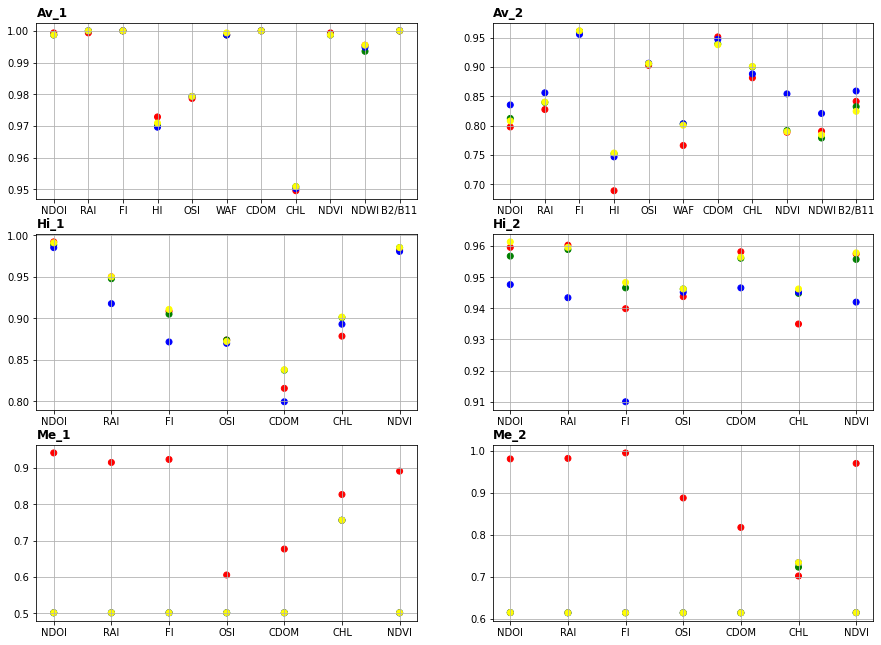

In [34]:
fig = plt.figure(figsize=(15,11))
col = {'KNN':'red', 'Decision tree':'green', 'Random Forest':'blue', 'Ada Boost':'yellow'}

for i in range(0,len(images)):
    ax = fig.add_subplot(3,2,i+1)
    title = images_name[i]
    plt.grid()
    plt.title(title, fontweight='bold', fontsize=12, loc='left')
    plt.scatter(images[i]['Index'].tolist(), images[i]['Accuracy'].tolist(), marker='o', color = images[i].Model.map(col))


In [35]:
#plt.plot(x_val, y_val, marker='o', linestyle='--')
#Av_1.plot.line(x = "Index", y = 'Accuracy', color = Av_1.Model.map(col))

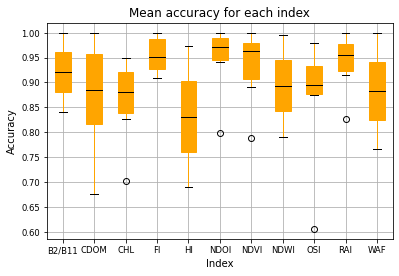

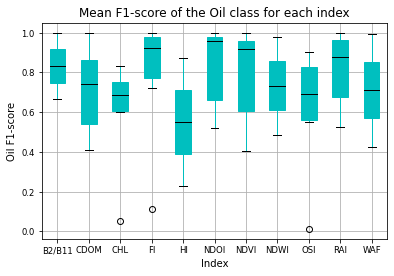

In [41]:
#df.boxplot(column="Accuracy", by="Model")
#df.boxplot(column="Oil f1-score", by="Model")

df[df.Model == "KNN"].boxplot(column="Accuracy", by="Index", patch_artist = True, fontsize=8.5, 
                              color = dict(boxes='orange', whiskers='orange', medians='black', caps='black'))
plt.ylabel("Accuracy"); plt.suptitle(''); plt.title('Mean accuracy for each index')
#plt.savefig("data/Index_BoxplotAccuracy.eps", bbox_inches='tight',pad_inches = 0)

df[df.Model == "KNN"].boxplot(column="Oil f1-score", by="Index", patch_artist = True,  fontsize=8.5, 
                              color = dict(boxes='c', whiskers='c', medians='black', caps='black'))
plt.ylabel("Oil F1-score"); plt.suptitle(''); plt.title('Mean F1-score of the Oil class for each index')
#plt.savefig("data/Index_BoxplotOilF1.eps", bbox_inches='tight',pad_inches = 0)

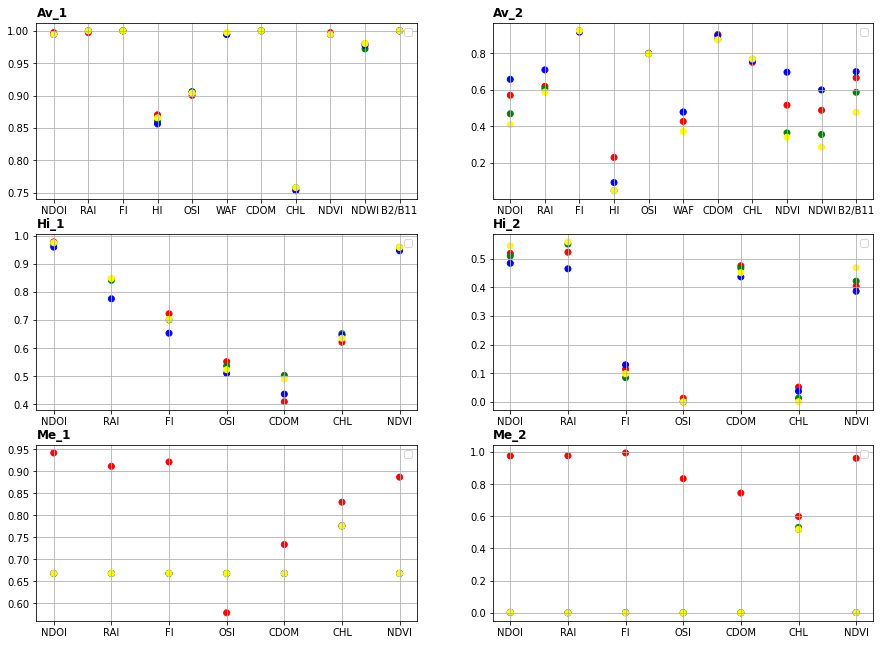

In [38]:
fig = plt.figure(figsize=(15,11))
col = {'KNN':'red', 'Decision tree':'green', 'Random Forest':'blue', 'Ada Boost':'yellow'}

for i in range(0,len(images)):
    ax = fig.add_subplot(3,2,i+1)
    title = images_name[i]
    plt.legend(col)
    plt.grid()
    plt.title(title, fontweight='bold', fontsize=12, loc='left')
    plt.scatter(images[i]['Index'].tolist(), images[i]['Oil f1-score'].tolist(), marker='o', color = images[i].Model.map(col))


Text(0.5, 1.0, 'Comparison of metrics for assessing the indexes')

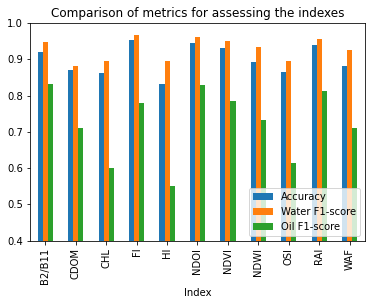

In [39]:
df[df.Model == "KNN"].groupby('Index').mean().plot.bar(y = ["Accuracy", "Water f1-score", "Oil f1-score"])
plt.ylim(0.4, 1)
plt.title("Index Accuracy for Hi_1 (KNN)")
plt.legend(["Accuracy", "Water F1-score", "Oil F1-score"], loc='lower right')
plt.suptitle(''); plt.title('Comparison of metrics for assessing the indexes')
#plt.savefig("data/Index_Metrics.eps", bbox_inches='tight',pad_inches = 0)

## Three classes

In [11]:
df = pd.read_excel(r'data\df_3classes.xlsx') 
df.head()

,Unnamed: 0,Sensor,Date,Index,Model,Accuracy,Water precision,Water f1-score,Water test pixels,Thick precision,Thick f1-score,Thick test pixels,Thin precision,Thin f1-score,Thin test pixels
0,0,AVIRIS,1,NDOI,KNN,0.968166,0.989551,0.988518,959,0.954357,0.950413,243,0.898785,0.906122,243
1,1,AVIRIS,1,NDOI,Decision tree,0.966782,0.990586,0.989034,959,0.953782,0.943867,243,0.888446,0.902834,243
2,2,AVIRIS,1,NDOI,Random Forest,0.958478,0.984407,0.985945,959,0.926829,0.932515,243,0.886076,0.875000,243
3,3,AVIRIS,1,NDOI,Ada Boost,0.964706,0.990546,0.986918,959,0.953975,0.946058,243,0.877953,0.897384,243
4,4,AVIRIS,1,RAI,KNN,0.971626,0.992701,0.992701,959,0.953782,0.943867,243,0.907258,0.916497,243


In [12]:
Av_1 = df[(df.Sensor == "AVIRIS") & (df.Date == 1)]; Av_2 = df[(df.Sensor == "AVIRIS") & (df.Date == 2)]
Hi_1 = df[(df.Sensor == "HICO") & (df.Date == 1)];   Hi_2 = df[(df.Sensor == "HICO") & (df.Date == 2)]
Me_1 = df[(df.Sensor == "MERIS") & (df.Date == 1)];  Me_2 = df[(df.Sensor == "MERIS") & (df.Date == 2)]

images = [Av_1, Av_2, Hi_1, Hi_2, Me_1, Me_2]
images_name = ["Av_1", "Av_2", "Hi_1", "Hi_2", "Me_1", "Me_2"]

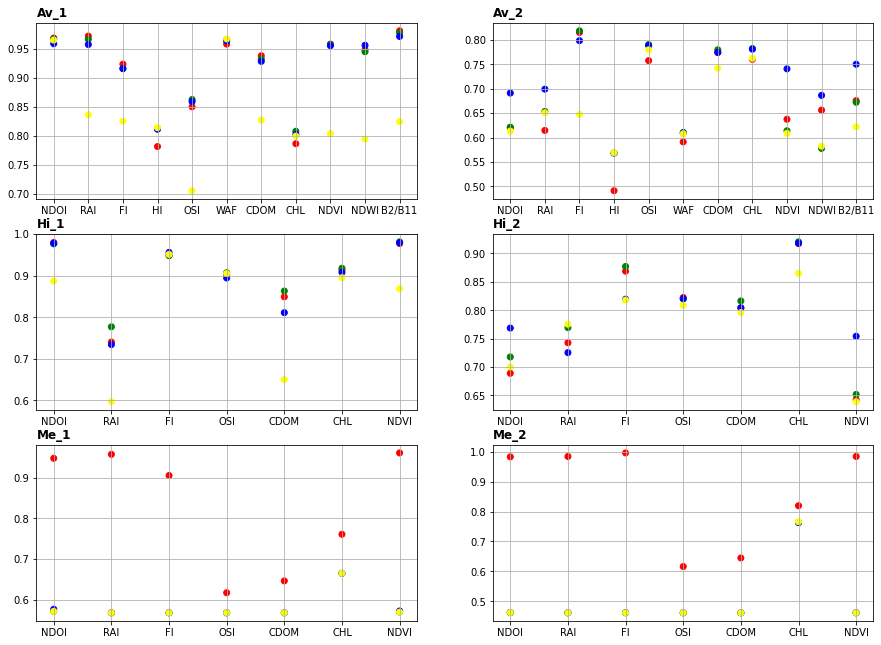

In [13]:
fig = plt.figure(figsize=(15,11))
col = {'KNN':'red', 'Decision tree':'green', 'Random Forest':'blue', 'Ada Boost':'yellow'}

for i in range(0,len(images)):
    ax = fig.add_subplot(3,2,i+1)
    title = images_name[i]
    plt.grid()
    plt.title(title, fontweight='bold', fontsize=12, loc='left')
    plt.scatter(images[i]['Index'].tolist(), images[i]['Accuracy'].tolist(), marker='o', color = images[i].Model.map(col))


Text(0.5, 1.0, 'Thick f1-score for Av_1 (KNN)')

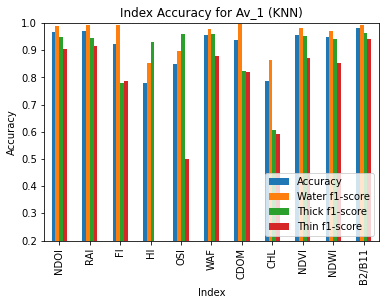

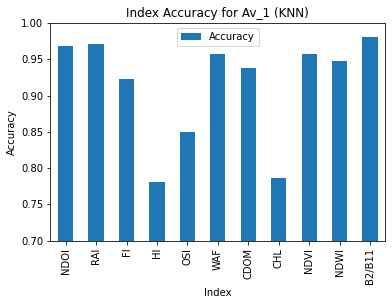

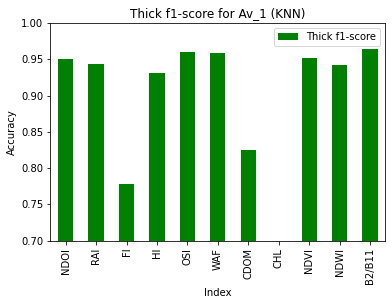

In [14]:
Av_1[Av_1.Model == "KNN"].plot.bar(x = "Index", y = ["Accuracy", "Water f1-score", "Thick f1-score", "Thin f1-score"])
plt.ylabel("Accuracy")
plt.ylim(0.2, 1)
plt.title("Index Accuracy for Av_1 (KNN)")
plt.legend(loc='lower right')

Av_1[Av_1.Model == "KNN"].plot.bar(x = "Index", y = "Accuracy")
plt.ylim(0.7, 1)
plt.ylabel("Accuracy")
plt.title("Index Accuracy for Av_1 (KNN)")


Av_1[Av_1.Model == "KNN"].plot.bar(x = "Index", y = "Thick f1-score", color = "green")
plt.ylim(0.7, 1)
plt.ylabel("Accuracy")
plt.title("Thick f1-score for Av_1 (KNN)")